# Countryside Survey

Countryside Survey is a unique study or ‘audit’ of the natural resources of the UK’s countryside. The Survey has been carried out at discrete intervals since 1978. The countryside is sampled and studied using rigorous scientific methods, allowing results to be compared with those from previous surveys. In this way the quantity and quality of change in our landscapes can be recorded and even the most gradual and subtle changes that occur in the UK’s countryside over time can be detected. This evidence is used to help form policies that influence management of the countryside, both now and in the future.

**Server** [/1.0/2069de82-619d-4751-9904-aec8500d07e6](https://data-eidc.ceh.ac.uk/1.0/2069de82-619d-4751-9904-aec8500d07e6)

**Documentation** <https://data-eidc.ceh.ac.uk/docs/cs>

### 🔒 Authentication

Create a token with [Data API Auth](https://data-eidc.ceh.ac.uk/authentication) with the following **LICENCES** (LICENCE_OGL)

## Step 1: Install dependencies

In [2]:
% pip install bng_latlon

import math
import json
import pprint
import time
from io import BytesIO, StringIO

from latlon_to_bng import WGS84toOSGB36
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc
import numpy as np
import pandas
import requests

## Step 2: Set the token

**WARNING** do not share tokens publicly, get them from secure environment variables or secure files. You can revoke a token at anytime and set the expiry such that if you do intend to share a notebook you do not compromise your tokens.


Here is an example of how to read the token from a file, in Colab open Files tab and click "Mount Drive" button and you should be able to do something similar to the following.

In [ ]:
import os
os.listdir('drive/My Drive')
f = open('drive/My Drive/token.txt', "r")
token = f.read()

## Step 3: Request the data

The following are some functions which will allow you to fetch the data

In [ ]:
url = 'https://data-eidc.ceh.ac.uk/1.0/2069de82-619d-4751-9904-aec8500d07e6'

# Go to here for more info on the endpoints https://data-eidc.ceh.ac.uk/docs/cs

# The /metadata endpoint

def metadata(params={}):
    res = requests.get(
        "{}/metadata".format(url),
        params=params,
        headers={
            "Authorization": "Bearer {}".format(token)
        }
    )
    return res.json()


# The /metadata/key/{key} endpoint

def key_values(key):
    res = requests.get(
        "{}/metadata/key/{}".format(url, key),
        headers={
            "Authorization": "Bearer {}".format(token)
        }
    )
    return res.json()


# The /data endpoint. Using POST over GET as it is easier to manipulate the body in python over the query parameters

def post(params):
    res = requests.post(
        "{}/data".format(url),
        data=json.dumps(params),
        headers={
            "Authorization": "Bearer {}".format(token),
            "Accept": "text/csv",
            "Content-Type": "application/json"
        }
    )
    if not res.ok:
        return res.content
    return pandas.read_csv(BytesIO(res.content))


## Metadata Request

The Countryside Survey Data API has a metadata endpoint which allows you to automate your scripts without the need for worrying about typos or if the metadata changes e.g. more data is added.

The metadata is derived from the data EIDC catalogue <https://catalogue.ceh.ac.uk/documents/2069de82-619d-4751-9904-aec8500d07e6>

In [ ]:
# Example metadata query for all vegetation in the year 2007

metadata({
    "tags": ["veget"],
    "years": ["2007"]
})

[{'acronym': 'vp',
  'columns': [{'name': 'YEAR', 'type': 'int64'},
   {'name': 'SQUARE', 'type': 'string'},
   {'name': 'PLOT', 'type': 'string'},
   {'name': 'AMALG_PTYPE', 'type': 'string'},
   {'name': 'BRC_NUMBER', 'type': 'float64'},
   {'name': 'BRC_NAMES', 'type': 'string'},
   {'name': 'NEST_LEVEL', 'type': 'float64'},
   {'name': 'ZERO_COVER', 'type': 'float64'},
   {'name': 'FIRST_COVER', 'type': 'float64'},
   {'name': 'TOTAL_COVER', 'type': 'float64'},
   {'name': 'PLOT_TYPE', 'type': 'string'},
   {'name': 'COUNTRY', 'type': 'string'},
   {'name': 'ENV_ZONE_2007', 'type': 'int64'},
   {'name': 'EZ_DESC_07', 'type': 'string'},
   {'name': 'WORDS', 'type': 'string'},
   {'name': 'TAG', 'type': 'string'},
   {'name': 'UID', 'type': 'string'},
   {'name': 'PARENT', 'type': 'string'}],
  'files': [{'columns': ['YEAR',
     'SQUARE_ID',
     'PLOT_ID',
     'AMALG_PTYPE',
     'BRC_NUMBER',
     'BRC_NAMES',
     'NEST_LEVEL',
     'ZERO_COVER',
     'FIRST_COVER',
     'TOTAL_

### Metadata breakdown

 key | description
 ---|---
`acronym` | Shorthand for datasets
`columns` | All the columns in the dataset, quicker than getting the data and interogating it, it also describe the format of each column
`files` | Each dataset has different files, if you want to know where the data originally came from. This also describes the columes of the data
`parent` | Each dataset is part of a parent dataset which you can go search for in the EIDC catalogue
`parent_title` | The title of the parent dataset
`tag` | A common tag for datasets which share similar data, this value is derived from the Catalogue
`title` | The title of the dataset in the catalogue
`uid` | The id of the dataset which you can use to find in the catalogue
`words` | Keywords from the title which may be useful for understanding the dataset without having to read all the metadata (alone)
`year` | The year the dataset was taken

### Merging datasets together

You can also merge datasets together, for example the `soil` and `vegetation`. The Data API will attempt to merge them together using a outer join on common column names. This might always be the desired dataset.

If you want to know what the dataset will attempt to merge run the metadata endpoint first and if you are happy continue

**WARNING** merging the with the `landscap` tag may result in a long wait or possible no result at all, this is a known issue and is being worked on. We suggest you query `landscap` seperatly

In [ ]:
# Check to see if veget and soil merge will give the expected dataframe

res = metadata({
    "tags": ["veget", "soil"]
})

In [ ]:
for value in res:
  print(value['year'], value['title'])

2007 Soil aggregate stability data from arable and grassland in Countryside Survey, Great Britain 2007 
2000 Soil invertebrate data 1998 [Countryside Survey]
2007 Soil invertebrate data 2007 [Countryside Survey]
2000 Soil metals data 1998 [Countryside Survey]
2007 Soil metals data 2007 [Countryside Survey]
1978 Soil physico-chemical properties 1978 [Countryside Survey]
2000 Soil physico-chemical properties 1998 [Countryside Survey]
2007 Soil physico-chemical properties 2007 [Countryside Survey]	
2007 Topsoil mineralisable nitrogen (mineral-N) data 2007 [Countryside Survey]
1978 Countryside Survey 1978 vegetation plot data
1990 Countryside Survey 1990 vegetation plot data
2000 Countryside Survey 1998 vegetation plot data
2007 Countryside Survey 2007 vegetation plot data


## Key Values

This endpoint lists all values for a given key which can be used for automation of your scripts, or to discover what values might be available

In [ ]:
# Get all the years of the data

years = key_values('year')
years

['1978', '1984', '1990', '2000', '2007']

In [ ]:
# Get all the tags of the data

tags = key_values('tag')
tags

['featur', 'habitat', 'landscap', 'mite', 'river', 'soil', 'veget', 'wat']

## Data endpoint

The data endpoint is where you can query the Data API to get the data in either JSON or CSV format. It automatically combines common data together and will attempt to merge datasets together. See metadata above for more info on this.

By way of example we have 3 seperate queries which will showcase some of the capabilities of the Countryside Survey Data API `/data` endpoint.

### Example Query 1:
*Combining the Landscape dataset and the vegetation dataset for all the years*

> What is the cover of all the vegetation in Bogs (over all years)?

#### Steps

1. Get all the `SQUARES` from the landscape data which are of type `Bog` i.e. from the data matching the tag `landscap`
2. Get all the vegetation data i.e. matching tag `veget`
3. Select all the vegetation over these squares
4. Display the result

In [ ]:
# Since we read the WARNING above we are querying the landscap dataset separate to the vegetation dataset and then we do not need to make another request for the data as it will be stored in memory

bog_squares = post({ "metadata": { 'tags': ["landscap"] }, "columns": ["SQUARE"], "query": "BROAD_HABITAT_NAME == 'Bog'" })
veget = post({ "metadata": { "tags": ["veget"] } })

In [ ]:
bog_veget = veget[veget['SQUARE'].isin(bog_squares['SQUARE'].values)]

In [ ]:
brc_names = bog_veget['BRC_NAMES'].dropna().drop_duplicates()
years = bog_veget['YEAR'].dropna().drop_duplicates()

In [ ]:
# Getting the total cover for each plant, for each year in order to plot along the X axis of a line chart

xs = []
for brc_name in brc_names[0:10]:
  x = []
  for year in years:
    mean = bog_veget[bog_veget['BRC_NAMES'] == brc_name][bog_veget['YEAR'] == year]['TOTAL_COVER'].mean()
    x.append(mean)
  xs.append(x)

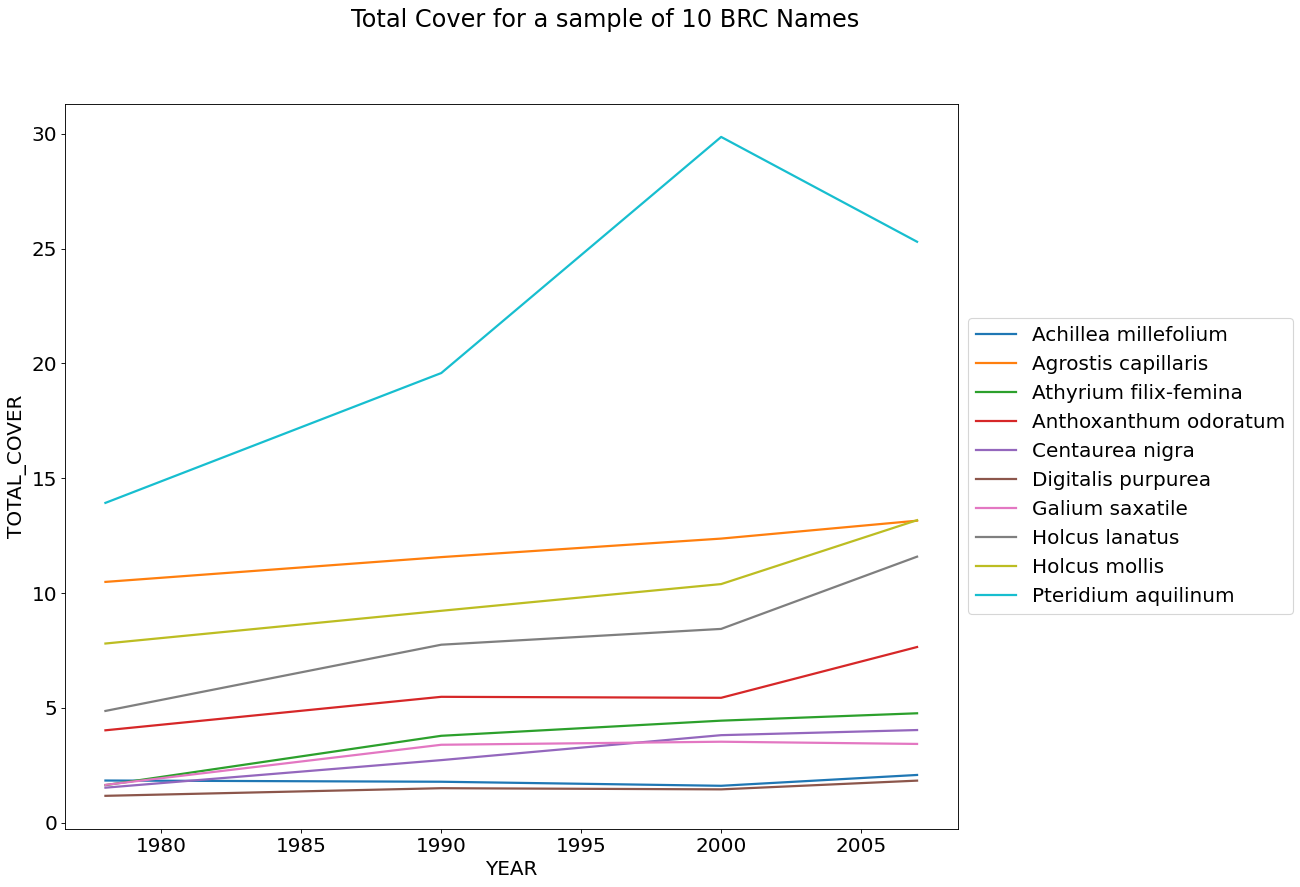

In [ ]:
# Fancy plot work

figure(num=None, figsize=(18, 12), dpi=80, facecolor='w', edgecolor='k')

font = { 'size' : 18 }
rc('font', **font)

plt.ylabel('TOTAL_COVER')
plt.xlabel('YEAR')
plt.suptitle('Total Cover for a sample of 10 BRC Names')

ax = plt.gca()
i = 0
for x in xs:
  ax.plot(years, x, linewidth=2.0, label=brc_names[i])
  i = i + 1

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Example Query 2:

*Spatial query*

> What are the soil moisture readings across Cumbria for the year 2007?

#### Steps

1. Setup the bounding box of cumbria and break into 10k grid
2. For each grid see if there is any `MOISTURE` data i.e. using the tag `soil`
3. Display the result

In [ ]:
# Creating a bounding box using lat,lon and converting them to BNG (British National Grid) values

cumbria = [54.031973,-3.652954,55.182984,-2.238464]

cumbria_south_west = WGS84toOSGB36(cumbria[0], cumbria[1])
cumbria_north_east = WGS84toOSGB36(cumbria[2], cumbria[3])

s = cumbria_south_west[1]
n = cumbria_north_east[1]
sn = range(round(s), round(n), 10000)
w = cumbria_south_west[0]
e = cumbria_north_east[0]
we = range(round(w), round(e), 10000)

In [ ]:
# For each 10k square in our bounding box we are getting soil data but we only want the mean of the moisture. Not all the plots will have data so we ignore those values

X, Y = np.meshgrid(we, sn)
Z = np.zeros_like(X) + np.zeros_like(Y)

for i in range(13):
  for j in range(10):
    x = X[i][j]
    y = Y[i][j]
    data = post({
      "metadata": {
          "tags": ["soil"],
          "years": ["2007"]
      },
      "spatial": {
          "east": int(x),
          "north": int(y)
      },
      "columns": ["MOISTURE"]
    })
    if not type(data) is bytes:
      value = data['MOISTURE'].mean()
      if math.isnan(value):
        value = 0
      Z[i][j] = value

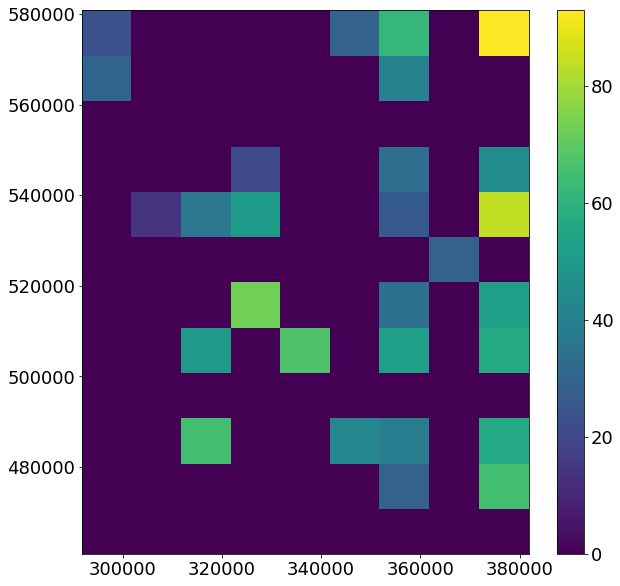

In [ ]:
# Fancy plot work

figure(num=None, figsize=(10, 10))
plt.pcolormesh(X,Y, Z)
plt.colorbar()
plt.show()

### Example Query 3:

*A single query over multiple datasets, using a complex filter*

> Are there any places where Calluna vulgaris or Erica tetrallix survive in soil with a "high" `PB` concentration (over all years)?

#### Steps

1. Do a single query for soil and vegetation where `PB > 100`
2. Display the result

In [ ]:
# This is a complex query over both siol and vegetation

soil_veget_pb = post({
    "metadata": {
        "tags": ["soil", "veget"]
    },
    "query": "PB > 100 and (BRC_NAMES == 'Calluna vulgaris' or BRC_NAMES == 'Erica tetralix')",
    "columns": ["YEAR", "PLOT", "BRC_NAMES", "PB"]
})

In [ ]:
# What? No fancy plot?

soil_veget_pb

,YEAR,PLOT,BRC_NAMES,PB
0,2000,GQEZGLLIPT,Erica tetralix,122.57
1,2000,LJHDNCQWYZ,Calluna vulgaris,252.35
2,2000,PTDRDLEGUH,Calluna vulgaris,162.74
3,2000,LCKYRSRYAC,Calluna vulgaris,108.15
4,2000,WCWNGNXZJY,Calluna vulgaris,152.44
...,...,...,...,...
74,2000,QFHFUVIFDB,Calluna vulgaris,235.87
75,2007,FDEAUOVVBR,Calluna vulgaris,164.00
76,2007,FDEAUOVVBR,Erica tetralix,164.00
77,2007,TIACCEVTES,Calluna vulgaris,147.00
